In [2]:
import nltk
from nltk.metrics import *
import nltk.translate.bleu_score 
from nltk.translate.bleu_score import sentence_bleu
import pandas as pd
import numpy as np
import os
import nltk

In [10]:
# get the actual descriptions from the test file
df_resnet_actual=pd.read_csv('video_captioning_dataset/YouTubeClips/Iteration_Resnet/test.csv')
df_vgg16_pred=pd.read_csv('video_captioning_dataset/YouTubeClips/iteration2/video_captioning_results.txt',header=None)
df_resnet_pred=pd.read_csv('video_captioning_dataset/YouTubeClips/Iteration_Resnet/video_captioning_results.txt',header=None)
df_vgg16_actual=pd.read_csv('video_captioning_dataset/YouTubeClips/iteration2/test.csv')

In [11]:
df_resnet_pred.head()
df_resnet_pred.shape[0]

648

In [12]:
video_path=df_actual.video_path.unique()

NameError: name 'df_actual' is not defined

In [14]:
actual_resnet_captions={}
for i in range(len(df_resnet_actual)):
    if df_resnet_actual['video_path'].iloc[i] not in actual_resnet_captions:
        actual_resnet_captions[df_resnet_actual['video_path'].iloc[i]]=[]
    actual_resnet_captions[df_resnet_actual['video_path'].iloc[i]].append(df_resnet_actual['Description'].iloc[i])
    
    
actual_vgg16_captions={}
for i in range(len(df_vgg16_actual)):
    if df_vgg16_actual['video_path'].iloc[i] not in actual_vgg16_captions:
        actual_vgg16_captions[df_vgg16_actual['video_path'].iloc[i]]=[]
    actual_vgg16_captions[df_vgg16_actual['video_path'].iloc[i]].append(df_vgg16_actual['Description'].iloc[i])    
        
    

In [15]:
video_path_resnet=list( actual_resnet_captions.keys())
descriptions_resnet=list(actual_resnet_captions.values())
video_path_vgg16=list( actual_vgg16_captions.keys())
descriptions_vgg16=list(actual_vgg16_captions.values())

In [16]:
rdescription=[]

for item in descriptions_resnet:
    sent=[str(e) for e in item]
    #temp=sent[0]
    rdescription.append(sent)
    
vdescription=[]

for item in descriptions_vgg16:
    sent=[str(e) for e in item]
    #temp=sent[0]
    vdescription.append(sent)    
    

In [17]:
video=[]
for item in video_path:
    temp=item.split('\\')[-1]
    video.append(temp)
    

NameError: name 'video_path' is not defined

In [18]:
ref_captions=dict(zip(video,ndescription))
#ref_captions=sorted(ref_captions)

NameError: name 'ndescription' is not defined

In [211]:
#video_path[0],video[0],ndescription[0:2]

In [20]:
#Extract predicted captions from Resnet pretrained model
video_pred_resnet=[]
caption_pred_resnet=[]
rtemp=[]
for i in range(df_resnet_pred.shape[0]):
    if i%2==0:
        rtemp=df_resnet_pred.iloc[i].tolist()
        #temp=[str(e) for e in sent]
        rtemp=str(rtemp).split('\\')[-1]
        rtemp=str(rtemp).split(']')[0]
        rtemp=str(rtemp).split("'")[0]
        video_pred_resnet.append(rtemp)
    else:
        cap=str(df_resnet_pred.iloc[i].tolist())
        cap=str(cap).replace('[','').replace(']','')
        caption_pred_resnet.append(cap)

In [21]:
#Extract predicted captions from vgg16 pretrained model
video_pred_vgg16=[]
caption_pred_vgg16=[]
vtemp=[]
for i in range(df_vgg16_pred.shape[0]):
    if i%2==0:
        vtemp=df_vgg16_pred.iloc[i].tolist()
        #temp=[str(e) for e in sent]
        vtemp=str(vtemp).split('\\')[-1]
        vtemp=str(vtemp).split(']')[0]
        vtemp=str(vtemp).split("'")[0]
        video_pred_vgg16.append(vtemp)
    else:
        cap=str(df_vgg16_pred.iloc[i].tolist())
        cap=str(cap).replace('[','').replace(']','')
        caption_pred_vgg16.append(cap)

In [22]:
vdescription[0],caption_pred_vgg16[0]

(['An animated rugby game.',
  'Boys are playing a rugby on the ground.',
  'Computerized rugby players are passing the ball to each other.',
  'Men are passing a ball.',
  'Men are tossing a ball.',
  'Players are playing rugby.',
  'Some animated players are playing rugby.',
  'The man tackled the man with the ball.',
  'The players passed the ball to each other.',
  'The rules of rugby are demonstrated through an animated version of two teams playing the game.',
  'The team members passed the ball to each other.',
  'rugby video game',
  'A rugby game in progress',
  'Rugby Match is going on.',
  'A team is playing rugby.',
  'bugby game is coming in television',
  'the basket ball players are playing in the ground',
  'they are playing',
  'Men pass the ball to each other.',
  'Video game of rugby played by players.',
  'a rugby game playing.',
  'A group of men playing the rugby.',
  'people were playing in a ground.',
  'Animated rugby players are running down a field throwing a 

In [33]:
#pred_captions=dict(zip(video_pred,caption_pred))
#pred_captions=sorted(pred_captions)

In [24]:
import collections

In [34]:
def test1():
    bleu_scores=[]
    for i in range(len(caption_pred_resnet)):
        reference=rdescription[i]
        candidate=caption_pred_resnet[i]
        score=sentence_bleu(reference,candidate)#,weights=(1,0.25,0.25,0.25))
        bleu_scores.append(score)
        #print(score)
    return bleu_scores 

In [35]:
min(test1()),max(test1()),(sum(test1())/len(test1()))

(1.4874731910306748e-156, 0.975690339315189, 0.7342894185692884)

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
from importlib import reload


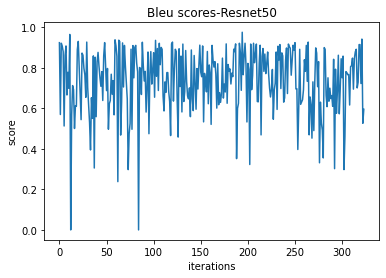

In [38]:
plt.plot(test1())
plt.title('Bleu scores-Resnet50')
plt.xlabel('iterations')
plt.ylabel('score')
plt.show()

In [30]:
def test2():
    bleu_scores=[]
    for i in range(len(caption_pred_vgg16)):
        reference=vdescription[i]
        candidate=caption_pred_vgg16[i]
        score=sentence_bleu(reference,candidate)#,weights=(1,0.25,0.25,0.25))
        bleu_scores.append(score)
        if score<0.4:
            print(score)
            print(i)
    return bleu_scores 

In [31]:
min(test2()),max(test2()),(sum(test2())/len(test2()))

0.3451860254472074
7
0.37218266015983137
103
0.3817666460451127
147
9.327292587886388e-234
180


D:\Users\Naga\Anaconda3\lib\site-packages\nltk\translate\bleu_score.py:516: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
D:\Users\Naga\Anaconda3\lib\site-packages\nltk\translate\bleu_score.py:516: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
D:\Users\Naga\Anaconda3\lib\site-packages\nltk\translate\bleu_score.py:516: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.

0.2995316414137092
224
0.29786672169361467
239
0.36882161790942913
267
0.2952818889864951
277
3.5384650434980955e-233
286
0.3451860254472074
7
0.37218266015983137
103
0.3817666460451127
147
9.327292587886388e-234
180
0.2995316414137092
224
0.29786672169361467
239
0.36882161790942913
267
0.2952818889864951
277
3.5384650434980955e-233
286
0.3451860254472074
7
0.37218266015983137
103
0.3817666460451127
147
9.327292587886388e-234
180
0.2995316414137092
224
0.29786672169361467
239
0.36882161790942913
267
0.2952818889864951
277
3.5384650434980955e-233
286
0.3451860254472074
7
0.37218266015983137
103
0.3817666460451127
147
9.327292587886388e-234
180
0.2995316414137092
224
0.29786672169361467
239
0.36882161790942913
267
0.2952818889864951
277
3.5384650434980955e-233
286


(9.327292587886388e-234, 0.9502746756165023, 0.7198913023889396)

0.3451860254472074
7
0.37218266015983137
103
0.3817666460451127
147
9.327292587886388e-234
180
0.2995316414137092
224
0.29786672169361467
239
0.36882161790942913
267
0.2952818889864951
277
3.5384650434980955e-233
286


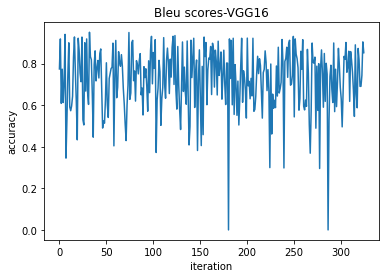

In [32]:
plt.plot(test2())
plt.title('Bleu scores-VGG16')
plt.xlabel('iteration')
plt.ylabel('accuracy')
plt.show()